In [68]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [69]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [70]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [71]:
train_data.shape

(7352, 563)

In [150]:
test_data.shape

(999, 563)

In [101]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [112]:
for col in train_data.columns:
    if(train_data[col].dtype==object):
        print(col)

Activity


In [72]:
print("Number of duplicates in training dataset:",sum(train_data.duplicated()))
print("Number of duplicates in testing dataset:",sum(test_data.duplicated()))

Number of duplicates in training dataset: 0
Number of duplicates in testing dataset: 0


In [73]:
print("Number of null values in training dataset:",train_data.isnull().values.sum())
print("Number of null values in testing dataset:",test_data.isnull().values.sum())

Number of null values in training dataset: 0
Number of null values in testing dataset: 0


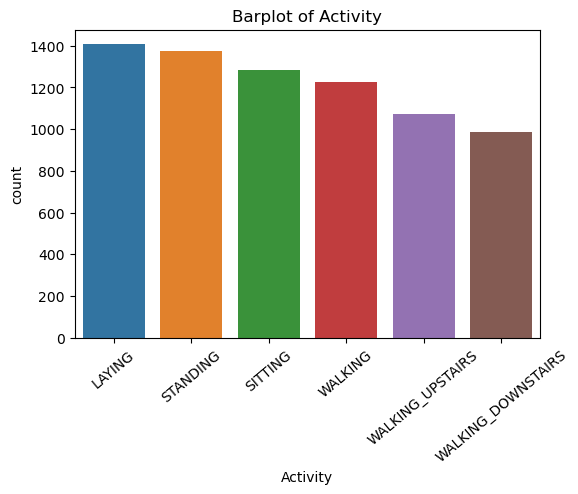

In [74]:
plt.figure(figsize=(6,4))
plt.title('Barplot of Activity')
sns.countplot(train_data,x='Activity',order=train_data.Activity.value_counts().index)
plt.xticks(rotation=40)
plt.show()

In [75]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train_data.columns]),orient='index').rename(columns={0:"Count"}).sort_values('Count',ascending=False)

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Text(0.1, 6, 'Dynamic Activities')

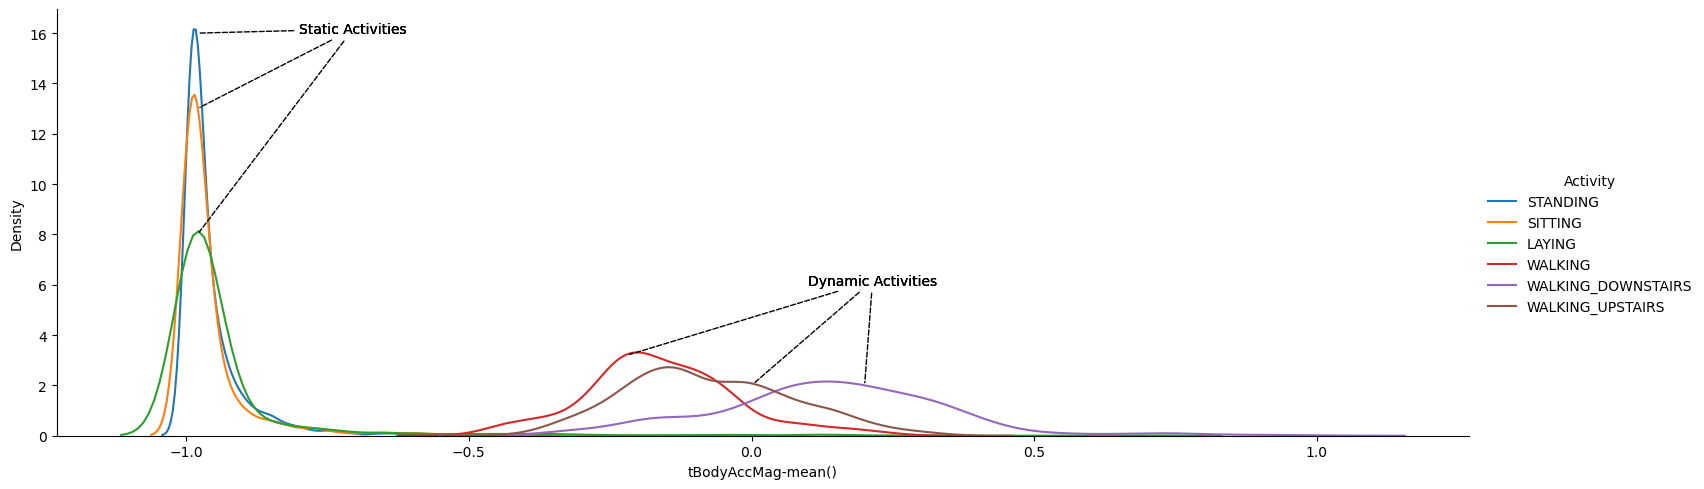

In [100]:
graph=sns.FacetGrid(train_data,hue='Activity',height=5,aspect=3)
graph.map(sns.distplot,'tBodyAccMag-mean()',hist=False).add_legend()
plt.annotate("Static Activities",xy=(-0.98,8),xytext=(-0.8,16),arrowprops={"arrowstyle":'-','ls':'dashed'})
plt.annotate("Static Activities",xy=(-0.98,13),xytext=(-0.8,16),arrowprops={"arrowstyle":'-','ls':'dashed'})
plt.annotate("Static Activities",xy=(-0.98,16),xytext=(-0.8,16),arrowprops={"arrowstyle":'-','ls':'dashed'})

plt.annotate("Dynamic Activities",xy=(-0.22,3.2),xytext=(0.1,6),arrowprops={"arrowstyle":'-','ls':'dashed'})
plt.annotate("Dynamic Activities",xy=(-0.0,2),xytext=(0.1,6),arrowprops={"arrowstyle":'-','ls':'dashed'})
plt.annotate("Dynamic Activities",xy=(0.2,2),xytext=(0.1,6),arrowprops={"arrowstyle":'-','ls':'dashed'})

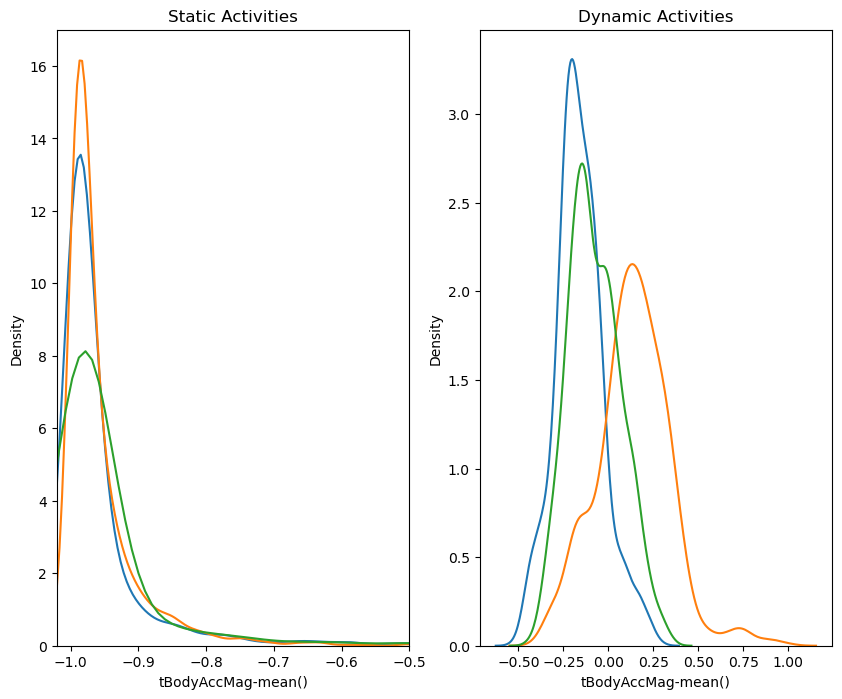

In [121]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('Static Activities')
sns.distplot(train_data[train_data['Activity']=='SITTING']['tBodyAccMag-mean()'],hist=False,label='Sitting')
sns.distplot(train_data[train_data['Activity']=='STANDING']['tBodyAccMag-mean()'],hist=False,label='Standing')
sns.distplot(train_data[train_data['Activity']=='LAYING']['tBodyAccMag-mean()'],hist=False,label='Laying')
plt.axis([-1.02,-0.5,0,17])
plt.subplot(1,2,2)
plt.title('Dynamic Activities')
sns.distplot(train_data[train_data['Activity']=='WALKING']['tBodyAccMag-mean()'],hist=False,label='Walking')
sns.distplot(train_data[train_data['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],hist=False,label='Walking Downstairs')
sns.distplot(train_data[train_data['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'],hist=False,label='Walking Upstairs')
plt.show()

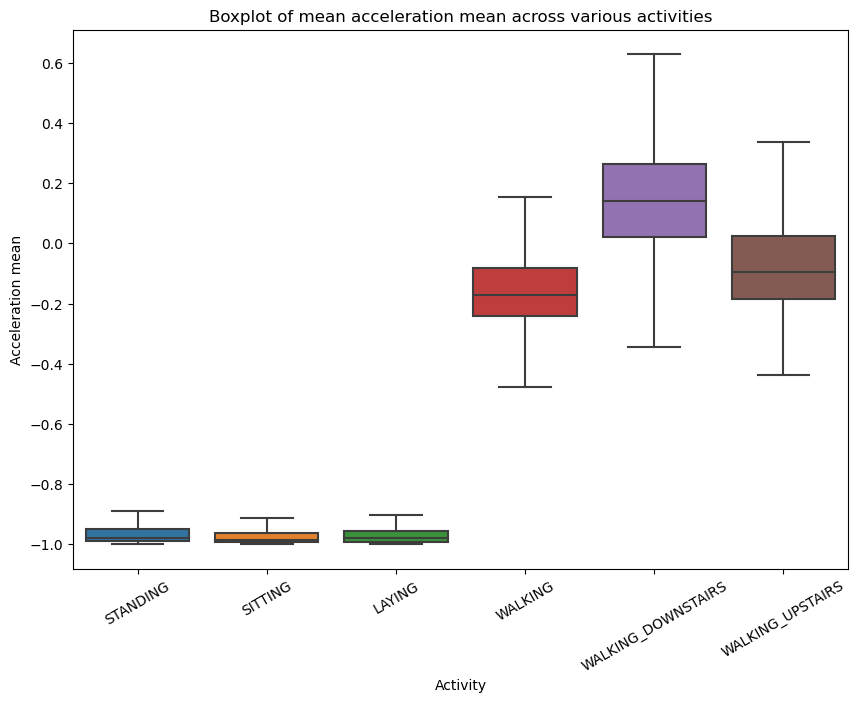

In [130]:
plt.figure(figsize=(10,7))
sns.boxplot(x=train_data['Activity'],y=train_data['tBodyAccMag-mean()'],showfliers=False)
plt.ylabel('Acceleration mean')
plt.title('Boxplot of mean acceleration mean across various activities')
plt.xticks(rotation=30)
plt.show()

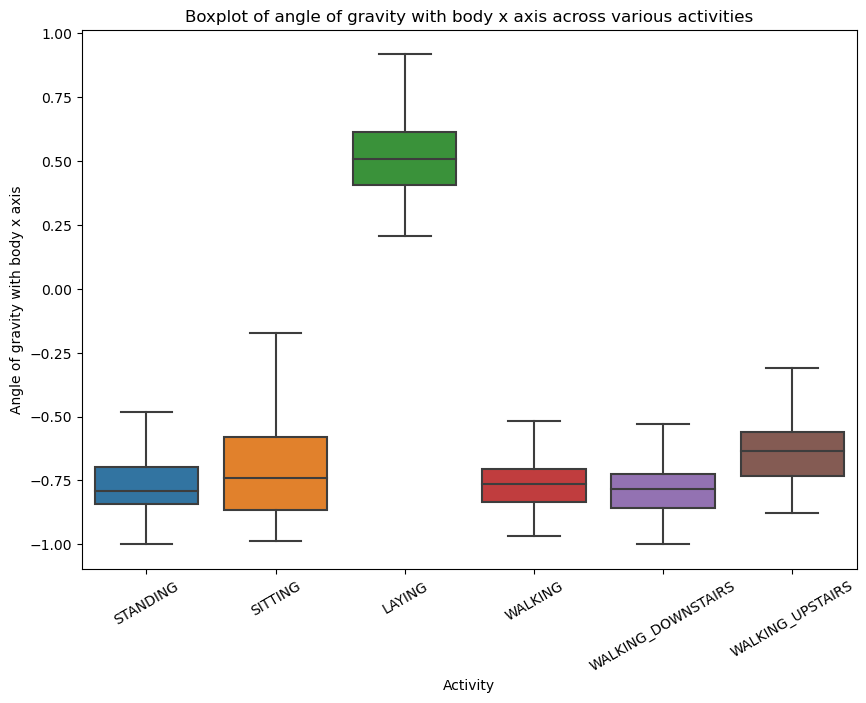

In [131]:
plt.figure(figsize=(10,7))
sns.boxplot(x=train_data['Activity'],y=train_data['angle(X,gravityMean)'],showfliers=False)
plt.ylabel('Angle of gravity with body x axis')
plt.title('Boxplot of angle of gravity with body x axis across various activities')
plt.xticks(rotation=30)
plt.show()

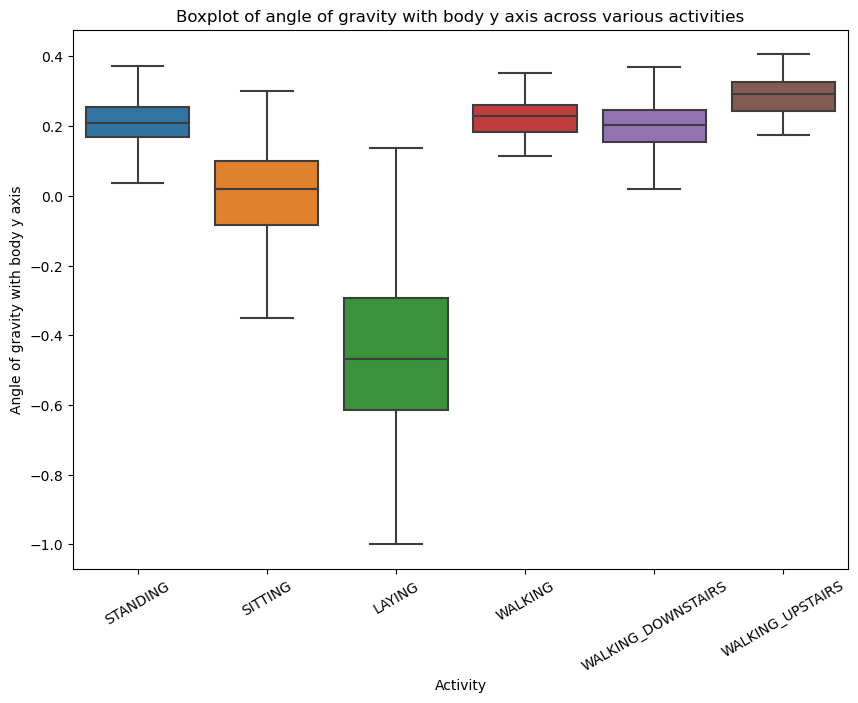

In [132]:
plt.figure(figsize=(10,7))
sns.boxplot(x=train_data['Activity'],y=train_data['angle(Y,gravityMean)'],showfliers=False)
plt.ylabel('Angle of gravity with body y axis')
plt.title('Boxplot of angle of gravity with body y axis across various activities')
plt.xticks(rotation=30)
plt.show()

In [138]:
x_pca=train_data.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=100).fit_transform(x_pca)

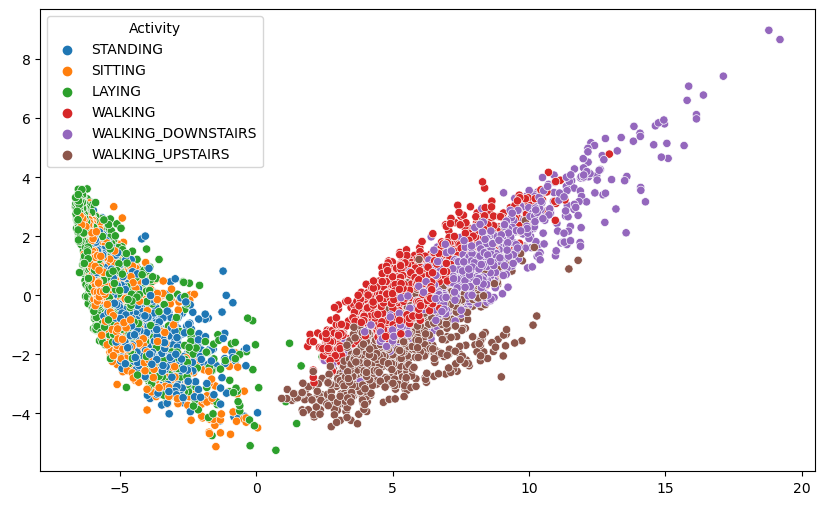

In [142]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train_data['Activity'])
plt.show()

In [143]:
x_tsne=train_data.drop(['subject','Activity'],axis=1)
tsne=TSNE(n_components=2,random_state=100,n_iter=1000).fit_transform(x_tsne)

In [147]:
tsne

array([[ -7.4094024, -63.326668 ],
       [-25.576761 , -17.057316 ],
       [-27.118528 , -20.289858 ],
       ...,
       [ 23.889086 , -60.16504  ],
       [ 23.881042 , -59.90744  ],
       [ 24.40074  , -59.159996 ]], dtype=float32)

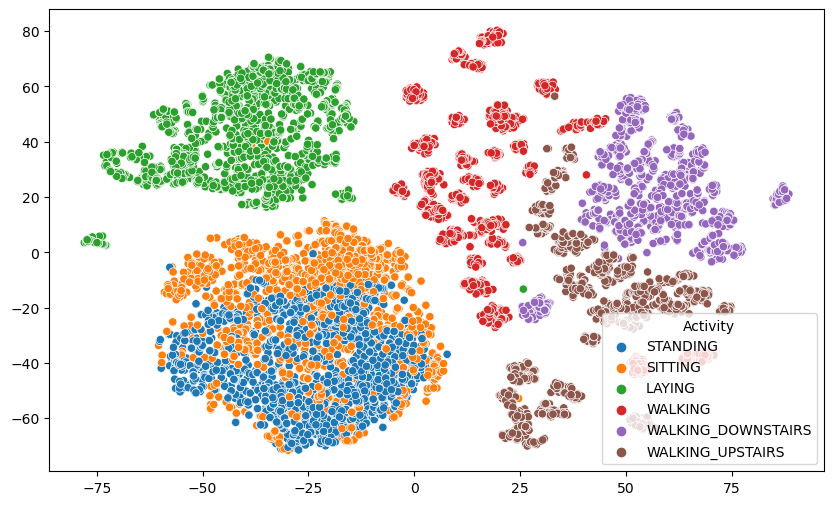

In [146]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train_data['Activity'])
plt.show()

In [148]:
x_train=train_data.drop(['subject','Activity'],axis=1)
y_train=train_data.Activity

x_test=test_data.drop(['subject','Activity'],axis=1)
y_test=test_data.Activity

In [149]:
print("Train data shape:",x_train.shape)
print("Test data shape:",x_test.shape)

Train data shape: (7352, 561)
Test data shape: (999, 561)


In [151]:
parameters={'max_iter':[100,200,500]}
lr_model=LogisticRegression()
lr_model_rs=RandomizedSearchCV(lr_model,param_distributions=parameters,cv=5,random_state=0)
lr_model_rs.fit(x_train,y_train)
y_lr_predict=lr_model_rs.predict(x_test)

In [152]:
print("Acuracy score of Logistic Regression Model:",accuracy_score(y_test,y_lr_predict)) 

Acuracy score of Logistic Regression Model: 0.954954954954955


In [174]:
def print_confusion_matrix(cm,labels):
    fig,ax=plt.subplots(figsize=(10,6))
    im=ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels,yticklabels=labels,
           ylabel='True Label',xlabel='Predicted Label')
    plt.xticks(rotation=90)
    thresh=cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i,j]),ha="center",va="center",color="white" if cm[i,j]>thresh else "black")
    fig.tight_layout()

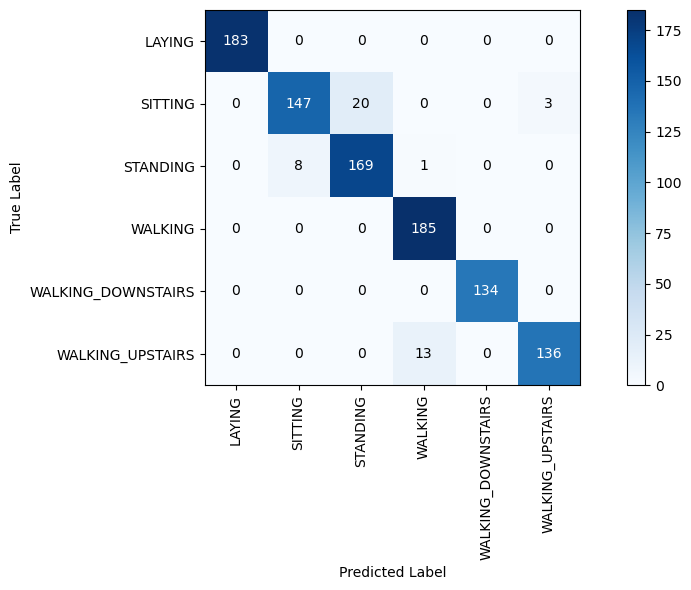

In [175]:
cm=confusion_matrix(y_test.values,y_lr_predict)
print_confusion_matrix(cm,np.unique(y_lr_predict))

In [182]:
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[50,100]}
svm_model=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=5,random_state=0)
svm_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [50, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=0)

In [183]:
y_pred_svm=svm_model.predict(x_test) 
print("Accuracy using Kernel SVM:",accuracy_score(y_test,y_pred_svm))

Accuracy using Kernel SVM: 0.9679679679679679


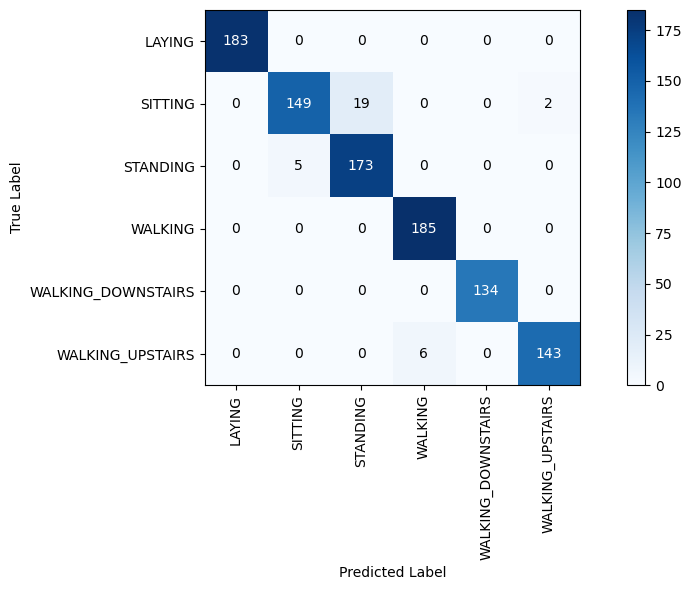

In [184]:
cm=confusion_matrix(y_test.values,y_pred_svm)
print_confusion_matrix(cm,np.unique(y_pred_svm))

In [185]:
parameters={'max_depth':np.arange(2,10)}
decision_tree_model=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameters,cv=5,random_state=0)
decision_tree_model.fit(x_train,y_train)
y_pred_dt=decision_tree_model.predict(x_test)

In [187]:
 print("Accuracy using Decision Tree:",accuracy_score(y_test,y_pred_dt))

Accuracy using Decision Tree: 0.8508508508508509


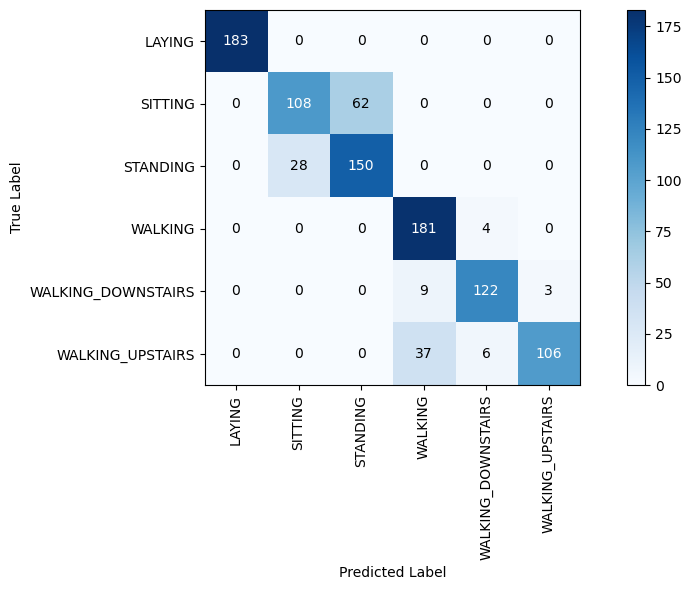

In [188]:
cm=confusion_matrix(y_test.values,y_pred_dt)
print_confusion_matrix(cm,np.unique(y_pred_dt))

In [195]:
parameters={'n_estimators':np.arange(20,101,10),'max_depth':np.arange(2,10,2)}
random_forest=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5,random_state=0)
random_forest.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=0)

In [196]:
y_pred_rf=random_forest.predict(x_test)
print("Accuracy using Random Forest:",accuracy_score(y_test,y_pred_rf))

Accuracy using Random Forest: 0.9039039039039038


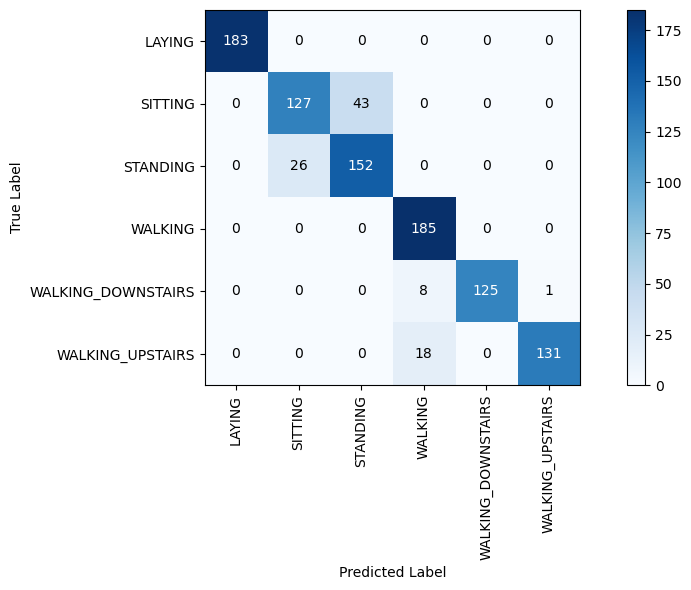

In [197]:
cm=confusion_matrix(y_test.values,y_pred_rf)
print_confusion_matrix(cm,np.unique(y_pred_rf))